In [ ]:
import polars as pl
from plots import pointplot

## mutated

In [2]:
long_df = pl.read_parquet('./results/mutated_per_pos_inference/mutated_long-results.parquet')

### by region, loss

In [3]:
ppl_df = long_df \
    .group_by(["model", "chain", "cdr_mask", "donor", "sequence_id"]) \
    .agg(pl.col("loss").median())

/home/jovyan/shared/Sarah/2.5_Scaling/Fig3/plots.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels)


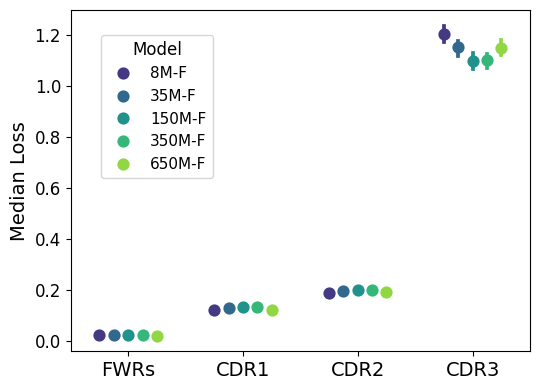

In [4]:
pointplot(
    data=ppl_df.filter((pl.col("chain") == "H")).to_pandas(),
    x="cdr_mask",
    y="loss",
    hue="model",
    hue_order=["8M-F", "35M-F", "150M-F", "350M-F", "650M-F"],
    palette="viridis",
    xlabel="",
    xlabel_fontsize=0,
    ylabel="Median Loss",
    order=["0", "1", "2", "3"],
    xtick_labels=["FWRs", "CDR1", "CDR2", "CDR3"],
    xtick_labelsize=14,
    show_legend=True,
    legend_kwargs=dict(title="Model"),
    figsize=[5.5,4],
    figfile="./figures/mutated-H-regions.pdf"
)

### detailed CDRH3 loss

In [5]:
cdr3_ppl_df = long_df \
    .filter(pl.col("cdr_mask") == "3") \
    .group_by(["model", "sequence_id", "chain", "gene_segment_mask", "donor"]) \
    .agg(pl.col("loss").median())

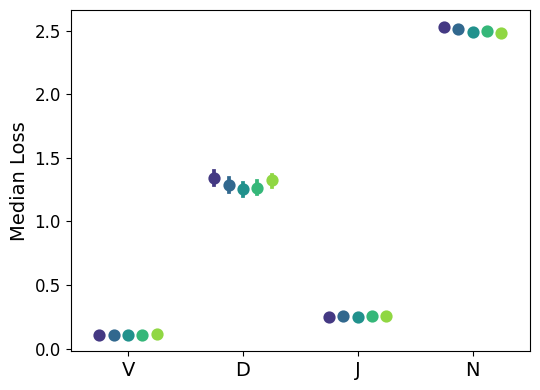

In [6]:
pointplot(
    data=cdr3_ppl_df.filter((pl.col("chain") == "H")).to_pandas(),
    x="gene_segment_mask",
    y="loss",
    order=["V", "D", "J", "N"],
    hue="model",
    hue_order=["8M-F", "35M-F", "150M-F", "350M-F", "650M-F"],
    palette="viridis",
    xlabel="",
    xlabel_fontsize=0,
    ylabel="Median Loss",
    xtick_labelsize=14,
    show_legend=False,    
    legend_kwargs=dict(title="Model"),
    figsize=[5.5,4],
    figfile="./figures/mutated-CDRH3-breakdown.pdf"
)

## unmutated

In [7]:
long_df = pl.read_parquet('./results/unmutated_per_pos_inference/unmutated_long-results.parquet')

### by region, loss

In [8]:
ppl_df = long_df \
    .group_by(["model", "chain", "cdr_mask", "donor", "sequence_id"]) \
    .agg(pl.col("loss").median())

/home/jovyan/shared/Sarah/2.5_Scaling/Fig3/plots.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels)


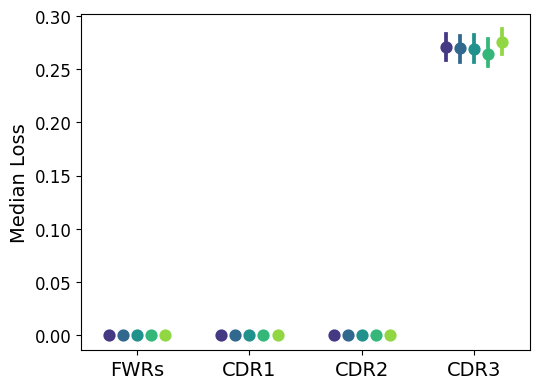

In [9]:
pointplot(
    data=ppl_df.filter((pl.col("chain") == "H")).to_pandas(),
    x="cdr_mask",
    y="loss",
    hue="model",
    hue_order=["8M-F", "35M-F", "150M-F", "350M-F", "650M-F"],
    palette="viridis",
    xlabel="",
    xlabel_fontsize=0,
    ylabel="Median Loss",
    order=["0", "1", "2", "3"],
    xtick_labels=["FWRs", "CDR1", "CDR2", "CDR3"],
    xtick_labelsize=14,
    show_legend=False,
    legend_kwargs=dict(title="Model"),
    figsize=[5.5,4],
    figfile="./figures/unmutated-H-regions.pdf"
)

### detailed CDRH3 loss

In [10]:
cdr3_ppl_df = long_df \
    .filter(pl.col("cdr_mask") == "3") \
    .group_by(["model", "sequence_id", "chain", "gene_segment_mask", "donor"]) \
    .agg(pl.col("loss").median())

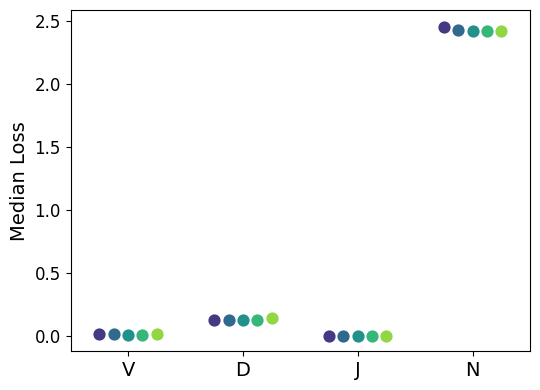

In [11]:
pointplot(
    data=cdr3_ppl_df.filter((pl.col("chain") == "H")).to_pandas(),
    x="gene_segment_mask",
    y="loss",
    order=["V", "D", "J", "N"],
    hue="model",
    hue_order=["8M-F", "35M-F", "150M-F", "350M-F", "650M-F"],
    palette="viridis",
    xlabel="",
    xlabel_fontsize=0,
    ylabel="Median Loss",
    xtick_labelsize=14,
    show_legend=False,    
    legend_kwargs=dict(title="Model"),
    figsize=[5.5,4],
    figfile="./figures/unmutated-CDRH3-breakdown.pdf"
)